In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data = pd.read_excel('optdigits-tra.xlsx',header = None) #不放置列索引
X = data.iloc[:,:64].to_numpy()
y = data.iloc[:,64].to_numpy()

In [4]:
data_test_outer = pd.read_excel('optdigits-tes.xlsx',header = None) #不放置列索引
X_test_outer = data_test_outer.iloc[:,:64].to_numpy()
y_test_outer = data_test_outer.iloc[:,64].to_numpy()

In [7]:
# 存储 k 值与对应的准确率
k_values = range(1, 12)
accuracies = []
accuracies_outer = []

# 训练模型并计算准确率
for k in k_values:
    # 1. 划分数据集：80% 训练，20% 测试
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 2. 创建 KNN 模型，设置最近邻居数 k = 5
    knn = KNeighborsClassifier(n_neighbors=k)

    # 3. 训练模型
    knn.fit(X_train, y_train)

    # 4. 对测试集进行预测
    y_pred = knn.predict(X_test)

    # 5. 评估模型性能（书写者）
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k={k}")
    print(f"KNN 书写者准确率: {accuracy:.3f}")

    # 输出详细的分类报告
    print("\n分类报告:")
    print(classification_report(y_test, y_pred))

    # 6. 评估模型性能（非书写者）
    accuracy_outer = accuracy_score(y_test_outer, knn.predict(X_test_outer))
    accuracies_outer.append(accuracy_outer)
    print(f"k={k}")
    print(f"KNN 非书写者准确率: {accuracy_outer:.3f}")

    # 输出详细的分类报告
    print("\n分类报告:")
    print(classification_report(y_test_outer, knn.predict(X_test_outer)))

k=1
KNN 书写者准确率: 0.982

分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.99      0.96      0.98        83
           2       1.00      0.99      0.99        84
           3       0.98      0.98      0.98        96
           4       0.97      1.00      0.98        61
           5       0.96      0.99      0.97        69
           6       0.99      1.00      0.99        70
           7       0.98      1.00      0.99        96
           8       0.97      0.97      0.97        66
           9       0.99      0.94      0.96        79

    accuracy                           0.98       765
   macro avg       0.98      0.98      0.98       765
weighted avg       0.98      0.98      0.98       765

k=1
KNN 非书写者准确率: 0.974

分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.93      0.99      0.96       182
           2       

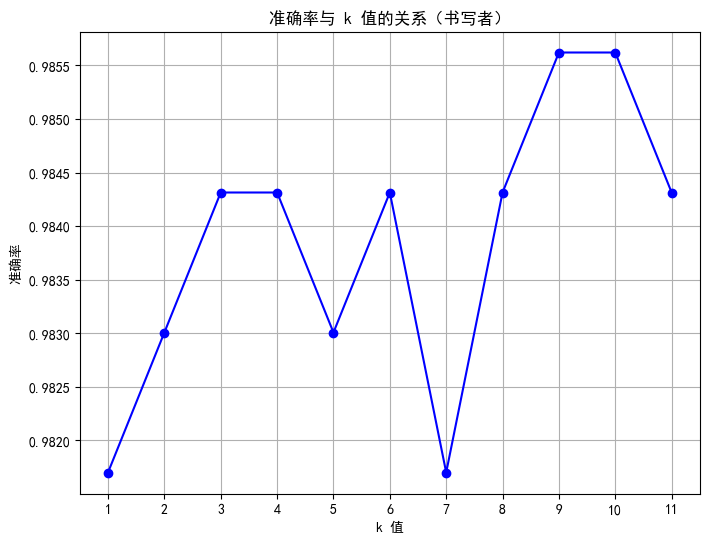

In [25]:
# 绘制准确率与k的关系图
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('准确率与 k 值的关系（书写者）')
plt.xlabel('k 值')
plt.ylabel('准确率')
plt.xticks(k_values)
plt.grid(True)
plt.show()

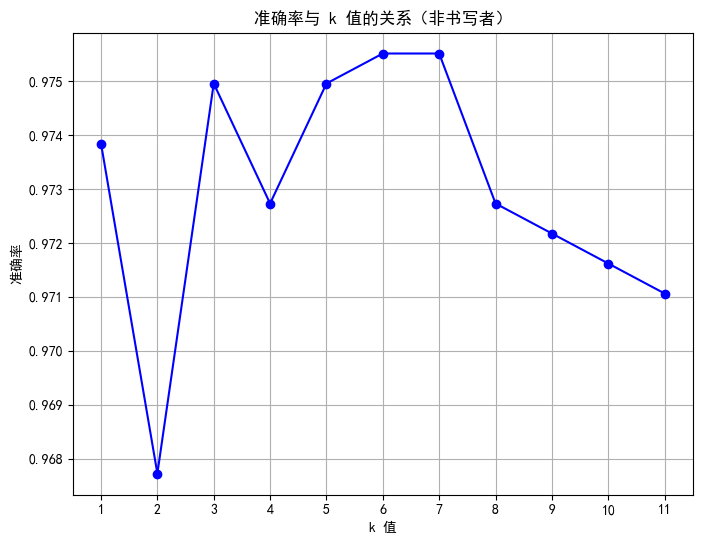

In [5]:
# 绘制准确率与k的关系图（非书写者）
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies_outer, marker='o', linestyle='-', color='b')
plt.title('准确率与 k 值的关系（非书写者）')
plt.xlabel('k 值')
plt.ylabel('准确率')
plt.xticks(k_values)
plt.grid(True)
plt.show()